In [17]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2

In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cat-dataset/cat.jpeg
/kaggle/input/rfcx-train-resnet50-with-tpu/history_0.png
/kaggle/input/rfcx-train-resnet50-with-tpu/history_1.png
/kaggle/input/rfcx-train-resnet50-with-tpu/history_3.png
/kaggle/input/rfcx-train-resnet50-with-tpu/model_best_2.h5
/kaggle/input/rfcx-train-resnet50-with-tpu/__results__.html
/kaggle/input/rfcx-train-resnet50-with-tpu/model_best_4.h5
/kaggle/input/rfcx-train-resnet50-with-tpu/history_2.png
/kaggle/input/rfcx-train-resnet50-with-tpu/model_best_3.h5
/kaggle/input/rfcx-train-resnet50-with-tpu/submission.csv
/kaggle/input/rfcx-train-resnet50-with-tpu/__notebook__.ipynb
/kaggle/input/rfcx-train-resnet50-with-tpu/__output__.json
/kaggle/input/rfcx-train-resnet50-with-tpu/model_best_0.h5
/kaggle/input/rfcx-train-resnet50-with-tpu/model_best_1.h5
/kaggle/input/rfcx-train-resnet50-with-tpu/history_4.png
/kaggle/input/rfcx-train-resnet50-with-tpu/custom.css
/kaggle/input/rfcx-train-resnet50-with-tpu/gradcams/split_0.png
/kaggle/input/rfcx-train-res

# Image Prepocessing

In [19]:
def is_image(file_path):
    try:
        with Image.open(file_path) as img:
            return True
    except Exception as e:
        return False

def preprocess_image(file_path):
    try:
        with Image.open(file_path) as img:
            # Ensure the image has 3 channels (RGB)
            if img.mode != 'RGB':
                print(f"Converting image to RGB: {file_path}")
                img = img.convert('RGB')
                img.save(file_path)  # Save the converted image back to the file
            return img
    except Exception as e:
        print(f"Error preprocessing image: {file_path}, Error: {str(e)}")
        return None

def remove_invalid_images_from_subfolders(main_folder):
    subfolders = ['cats', 'dogs']  # Add more subfolders if needed

    for subfolder in subfolders:
        subfolder_path = os.path.join(main_folder, subfolder)
        
        for filename in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, filename)
            
            if is_image(file_path):
                img = preprocess_image(file_path)
                if img is not None:
                    # Save the image back to the file if it needed conversion
                    if img.mode != 'RGB':
                        img.save(file_path)
                else:
                    print(f"Removing invalid or corrupt file: {file_path}")
                    os.remove(file_path)
            else:
                print(f"Skipping non-image file: {file_path}")

In [20]:
test_data_dir = '/kaggle/input/cats-and-dogs-image-classification/test'
remove_invalid_images_from_subfolders(test_data_dir)

Skipping non-image file: /kaggle/input/cats-and-dogs-image-classification/test/cats/cat_585.jpg
Skipping non-image file: /kaggle/input/cats-and-dogs-image-classification/test/cats/cat_595.jpg
Skipping non-image file: /kaggle/input/cats-and-dogs-image-classification/test/cats/cat_525.jpg
Skipping non-image file: /kaggle/input/cats-and-dogs-image-classification/test/cats/cat_306.jpg
Skipping non-image file: /kaggle/input/cats-and-dogs-image-classification/test/cats/cat_430.jpg
Skipping non-image file: /kaggle/input/cats-and-dogs-image-classification/test/cats/cat_551.jpg
Skipping non-image file: /kaggle/input/cats-and-dogs-image-classification/test/cats/cat_332.jpg
Skipping non-image file: /kaggle/input/cats-and-dogs-image-classification/test/cats/cat_156.jpg
Skipping non-image file: /kaggle/input/cats-and-dogs-image-classification/test/cats/cat_358.jpg
Skipping non-image file: /kaggle/input/cats-and-dogs-image-classification/test/cats/cat_417.jpg
Skipping non-image file: /kaggle/input/c

In [21]:
train_data_dir = '/kaggle/input/cats-and-dogs-image-classification/train'
remove_invalid_images_from_subfolders(train_data_dir)

Skipping non-image file: /kaggle/input/cats-and-dogs-image-classification/train/cats/cat_511.jpg
Skipping non-image file: /kaggle/input/cats-and-dogs-image-classification/train/cats/cat_78.jpg
Skipping non-image file: /kaggle/input/cats-and-dogs-image-classification/train/cats/cat_77.jpg
Skipping non-image file: /kaggle/input/cats-and-dogs-image-classification/train/cats/cat_141.jpg
Skipping non-image file: /kaggle/input/cats-and-dogs-image-classification/train/cats/cat_362.jpg
Skipping non-image file: /kaggle/input/cats-and-dogs-image-classification/train/cats/cat_253.jpg
Skipping non-image file: /kaggle/input/cats-and-dogs-image-classification/train/cats/cat_506.jpg
Skipping non-image file: /kaggle/input/cats-and-dogs-image-classification/train/cats/cat_325.jpg
Skipping non-image file: /kaggle/input/cats-and-dogs-image-classification/train/cats/cat_546.jpg
Skipping non-image file: /kaggle/input/cats-and-dogs-image-classification/train/cats/cat_386.jpg
Skipping non-image file: /kaggle

# Load Data Create Pipeline

In [22]:
#train_data=tf.keras.utils.image_dataset_from_directory(train_data_dir, color_mode='rgb', image_size=(224, 224), batch_size=32)

In [23]:
#test_data=tf.keras.utils.image_dataset_from_directory(test_data_dir, color_mode='rgb', image_size=(224, 224), batch_size=32)

# Model Training

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50

# Image size and batch size
img_width, img_height = 300,300   # Adjusted to match the expected input size of the pre-trained model
batch_size = 32

# Load training data using tf.keras.utils.image_dataset_from_directory

train_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    image_size=(img_width, img_height),  # Adjusted to match the expected input size of the model
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=1337
)

# Preprocess and augment data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Found 557 files belonging to 2 classes.
Using 446 files for training.


In [25]:
batch_train_data = train_data.as_numpy_iterator().next()

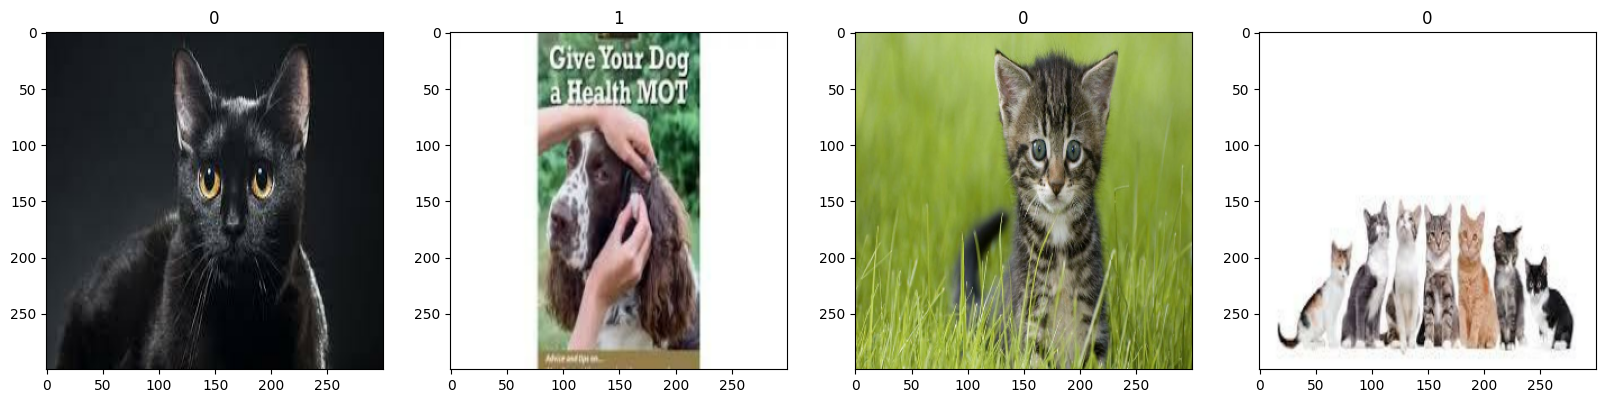

In [26]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch_train_data [0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch_train_data[1][idx])

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Image size and batch size
img_width, img_height = 300, 300
batch_size = 64

# Create a custom data generator for train data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

base_model = load_model('/kaggle/input/aptos-resnet50-baseline/Resnet50_bestqwk.h5', compile=False)


# Create a custom classification head
x = base_model.output
x = Flatten()(x)
x = Dropout(0.5, name='custom_dropout')(x)
x = Dense(128, activation='relu' ,name="customdense")(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the pre-trained ResNet up to a certain point
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model (make sure your training data is properly loaded)
model.fit(
    train_data,  # Update with your training data
    epochs=10,  # Adjust the number of epochs
)

# Save the model
model.save('cat_dog_model.h5')

Epoch 1/10
14/14 [==============================] - 7s 189ms/step - loss: 0.6929 - accuracy: 0.4955
Epoch 2/10
14/14 [==============================] - 4s 195ms/step - loss: 0.6949 - accuracy: 0.5135
Epoch 3/10
14/14 [==============================] - 5s 232ms/step - loss: 0.6930 - accuracy: 0.5202
Epoch 4/10
14/14 [==============================] - 4s 195ms/step - loss: 0.6965 - accuracy: 0.4798
Epoch 5/10
14/14 [==============================] - 4s 194ms/step - loss: 0.6942 - accuracy: 0.5045
Epoch 6/10
14/14 [==============================] - 4s 193ms/step - loss: 0.6937 - accuracy: 0.5022
Epoch 7/10
14/14 [==============================] - 4s 191ms/step - loss: 0.6940 - accuracy: 0.5045
Epoch 8/10
14/14 [==============================] - 4s 190ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 9/10
14/14 [==============================] - 4s 188ms/step - loss: 0.6943 - accuracy: 0.5135
Epoch 10/10
14/14 [==============================] - 4s 188ms/step - loss: 0.6934 - accuracy: 0.4798

In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('dog_cat_model.h5')

# Define a function to make predictions
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(300, 300))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img / 255.0  # Normalize the image

    # Make the prediction
    prediction = model.predict(img)

    if prediction > 0.5:
        return "Dog"
    else:
        return "Cat"

# Specify the path to the image you want to classify
image_path = '/kaggle/input/cat-dataset/cat.jpeg'

# Make the prediction
result = predict_image(image_path)
print(f"The image is a {result}")

1/1 [==============================] - 1s 834ms/step
The image is a Cat


# Evaluate

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()